In [167]:
import csv
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as font_manager
import pylab
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pingouin as pg

In [74]:
df = pd.read_csv("data for video analysis.csv", encoding='latin1')

In [75]:
df.dtypes

df['upload_date'] = pd.to_datetime(df['upload_date'].astype(str), format='%Y%m%d')

TypeError: set_title() missing 1 required positional argument: 'label'

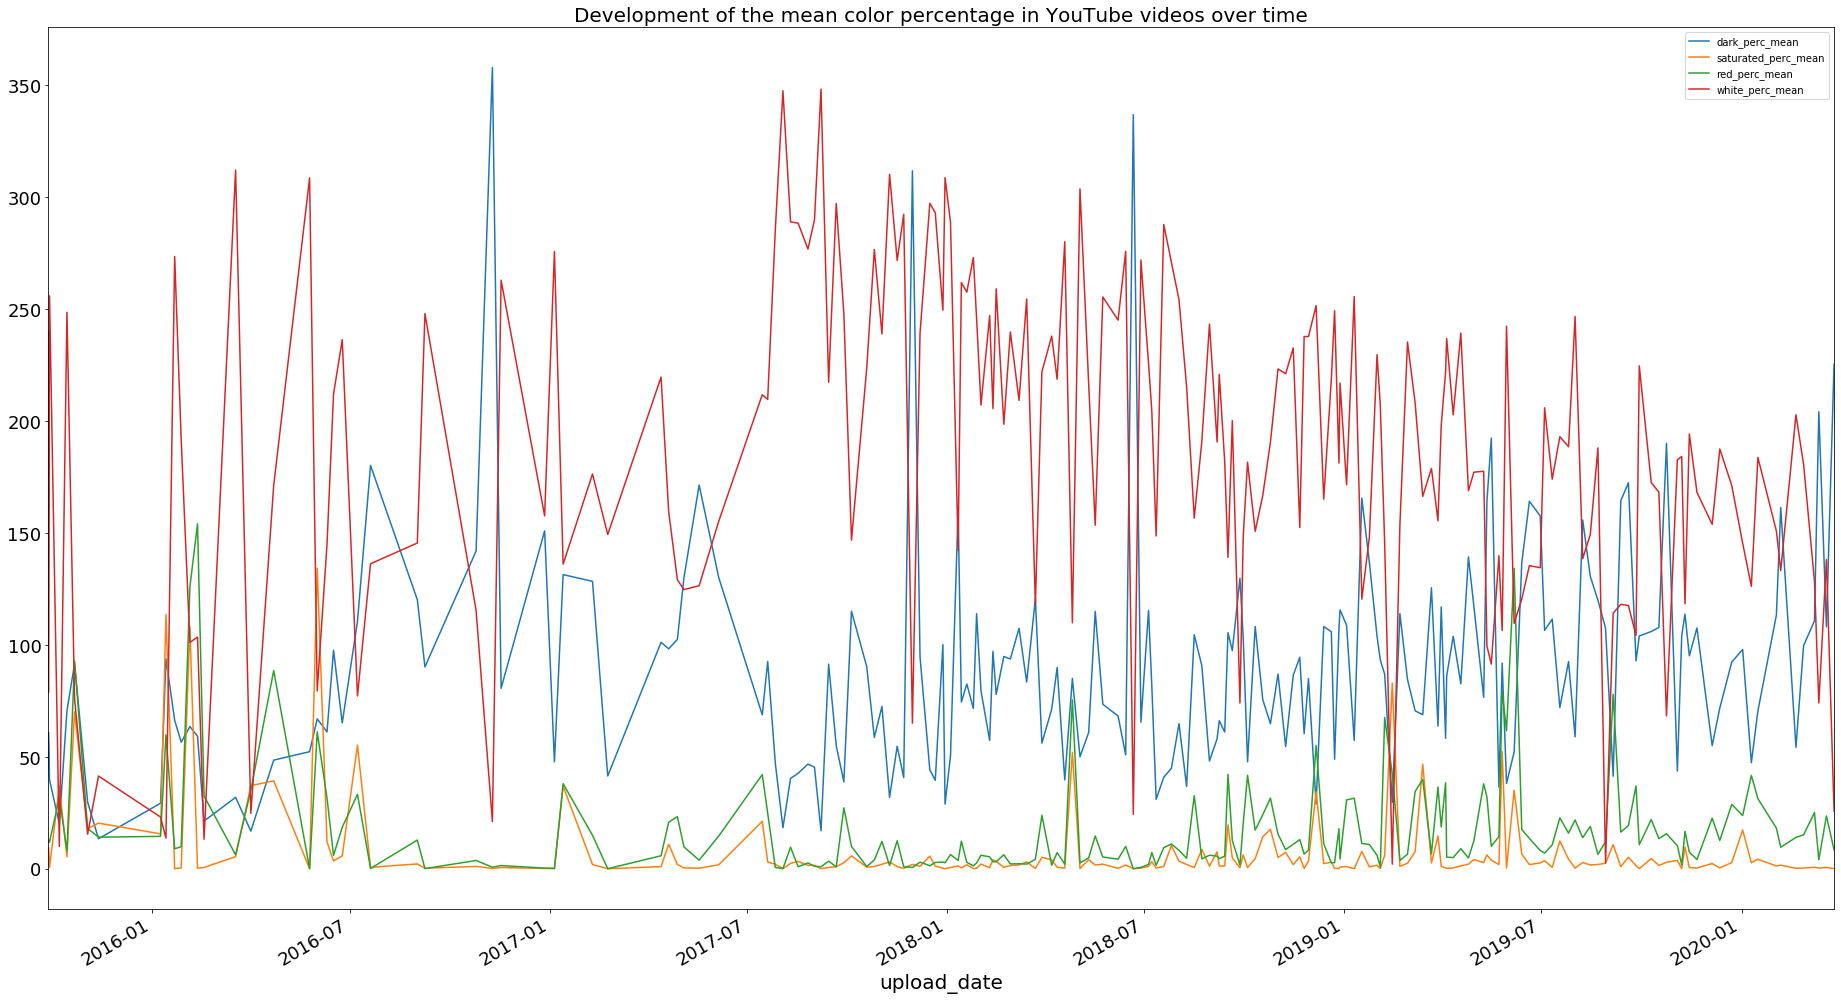

In [116]:
fig = plt.figure(figsize=(32,18))
ax1 = fig.add_subplot(1,1,1)

df.plot(y='dark_perc_mean', x='upload_date', title="Development of the mean color percentage in YouTube videos over time", ax=ax1, fontsize=18)
df.plot(y='saturated_perc_mean', x='upload_date', title="Development of the mean color percentage in YouTube videos over time", ax=ax1, fontsize=18)
df.plot(y='red_perc_mean', x='upload_date', title="Development of the mean color percentage in YouTube videos over time", ax=ax1, fontsize=18)
df.plot(y='white_perc_mean', x='upload_date', title="Development of the mean color percentage in YouTube videos over time", ax=ax1, fontsize=18)

ax1.legend()
ax1.xaxis.labelpad = 30

In [109]:
fig.savefig("all_colors_lineplot.png")

In [164]:
view_count = df['view_count']
like_count = df['like_count']
dislike_count = df['dislike_count']

dark_perc = df['dark_perc_mean']
saturated_perc = df['saturated_perc_mean']
red_perc = df['red_perc_mean']
white_perc = df['white_perc_mean']

In [173]:
#checking the normalcy of distribution
for param in ["view_count", "like_count", "dislike_count", "dark_perc_mean", "saturated_perc_mean", "red_perc_mean", "white_perc_mean"]:
    z, pval = stats.normaltest(data[param])
    #print(z)
    if(pval < 0.055):
        print("%s has a p-value of %f - distribution is NOT normal" % (param, pval))
    else:
        print("%s has a p-value of %f - distribution is assumed to be NORMAL" % (param, pval))
        
# as the majority of the data is NOT normally distributed we will use Spearman rank order correlation 

view_count has a p-value of 0.000000 - distribution is NOT normal
like_count has a p-value of 0.000000 - distribution is NOT normal
dislike_count has a p-value of 0.000000 - distribution is NOT normal
dark_perc_mean has a p-value of 0.000000 - distribution is NOT normal
saturated_perc_mean has a p-value of 0.000000 - distribution is NOT normal
red_perc_mean has a p-value of 0.000000 - distribution is NOT normal
white_perc_mean has a p-value of 0.063245 - distribution is assumed to be NORMAL


In [169]:
corr_dark_view = pg.corr(dark_perc, view_count, method='spearman') #if it is not specified it runs pearsons
print(corr_dark_view)

#run Spearman for non normally distributed data

            n      r         CI95%     r2  adj_r2    p-val  power
spearman  194  0.189  [0.05, 0.32]  0.036   0.026  0.00819  0.756


In [171]:
corr_dark_like = pg.corr(dark_perc, like_count, method='spearman') #if it is not specified it runs pearsons
print(corr_dark_like)

            n      r        CI95%     r2  adj_r2     p-val  power
spearman  194  0.236  [0.1, 0.37]  0.056   0.046  0.000905  0.916


In [172]:
corr_dark_dislike = pg.corr(dark_perc, dislike_count, method='spearman') #if it is not specified it runs pearsons
print(corr_dark_dislike)

            n      r         CI95%     r2  adj_r2     p-val  power
spearman  194  0.193  [0.05, 0.32]  0.037   0.027  0.007137  0.771


In [175]:
corr_sat_view = pg.corr(saturated_perc, view_count, method='spearman') #if it is not specified it runs pearsons
print(corr_sat_view)

            n      r          CI95%   r2  adj_r2     p-val  power
spearman  194 -0.001  [-0.14, 0.14]  0.0   -0.01  0.990972   0.05


In [174]:
corr_sat_like = pg.corr(saturated_perc, like_count, method='spearman') #if it is not specified it runs pearsons
print(corr_sat_like)

            n      r          CI95%   r2  adj_r2     p-val  power
spearman  194 -0.021  [-0.16, 0.12]  0.0   -0.01  0.770712   0.06


In [176]:
corr_sat_dislike = pg.corr(saturated_perc, dislike_count, method='spearman') #if it is not specified it runs pearsons
print(corr_sat_dislike)

            n     r          CI95%   r2  adj_r2     p-val  power
spearman  194 -0.02  [-0.16, 0.12]  0.0   -0.01  0.784402  0.059


In [193]:
corr_red_view = pg.corr(red_perc, view_count, method='spearman') #if it is not specified it runs pearsons
print(corr_red_view)

            n      r         CI95%     r2  adj_r2     p-val  power
spearman  194  0.198  [0.06, 0.33]  0.039   0.029  0.005642  0.794


In [194]:
corr_red_like = pg.corr(red_perc, like_count, method='spearman') #if it is not specified it runs pearsons
print(corr_red_like)

            n      r         CI95%     r2  adj_r2     p-val  power
spearman  194  0.209  [0.07, 0.34]  0.044   0.033  0.003514  0.835


In [195]:
corr_red_dislike = pg.corr(red_perc, dislike_count, method='spearman') #if it is not specified it runs pearsons
print(corr_red_dislike)

            n      r         CI95%     r2  adj_r2     p-val  power
spearman  194  0.193  [0.05, 0.33]  0.037   0.027  0.006901  0.774


In [196]:
corr_white_view = pg.corr(white_perc, view_count, method='spearman') #if it is not specified it runs pearsons
print(corr_white_view)

            n      r          CI95%   r2  adj_r2     p-val  power
spearman  194 -0.012  [-0.15, 0.13]  0.0   -0.01  0.863805  0.053


In [197]:
corr_white_like = pg.corr(white_perc, like_count, method='spearman') #if it is not specified it runs pearsons
print(corr_white_like)

            n      r         CI95%     r2  adj_r2     p-val  power
spearman  194 -0.066  [-0.2, 0.08]  0.004  -0.006  0.362128  0.149


In [198]:
corr_white_dislike = pg.corr(white_perc, dislike_count, method='spearman') #if it is not specified it runs pearsons
print(corr_white_dislike)

            n      r         CI95%     r2  adj_r2     p-val  power
spearman  194 -0.038  [-0.18, 0.1]  0.001  -0.009  0.600726  0.082


In [ ]:
data_2plot = df[["dark_perc_mean","view_count"]]
plot_corr_sns = sns.regplot(x="dark_perc_mean", y="view_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of dark pixels",fontsize=12)
plot_corr_sns.set_ylabel("view count",fontsize=12)
plt.show() 

In [ ]:
plot_corr_sns.figure.savefig("scatterplot_View__darkperc.png")

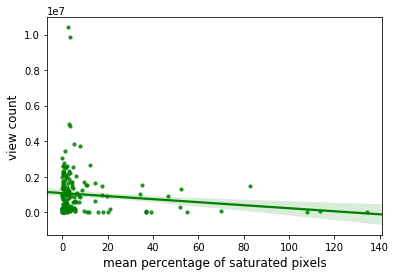

In [161]:
data_2plot = df[["saturated_perc_mean","view_count"]]
plot_corr_sns = sns.regplot(x="saturated_perc_mean", y="view_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of saturated pixels",fontsize=12)
plot_corr_sns.set_ylabel("view count",fontsize=12)
plt.show() 

In [162]:
plot_corr_sns.figure.savefig("scatterplot_View__saturatedperc.png")

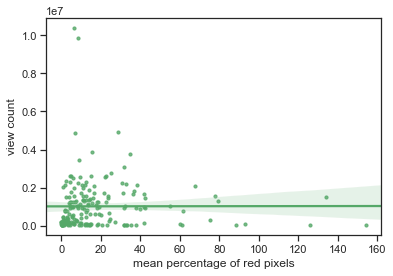

In [177]:
data_2plot = df[["red_perc_mean","view_count"]]
plot_corr_sns = sns.regplot(x="red_perc_mean", y="view_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of red pixels",fontsize=12)
plot_corr_sns.set_ylabel("view count",fontsize=12)
plt.show() 

In [178]:
plot_corr_sns.figure.savefig("scatterplot_View__redperc.png")

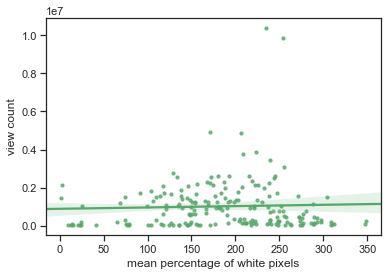

In [179]:
data_2plot = df[["white_perc_mean","view_count"]]
plot_corr_sns = sns.regplot(x="white_perc_mean", y="view_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of white pixels",fontsize=12)
plot_corr_sns.set_ylabel("view count",fontsize=12)
plt.show() 

In [180]:
plot_corr_sns.figure.savefig("scatterplot_View__whiteperc.png")

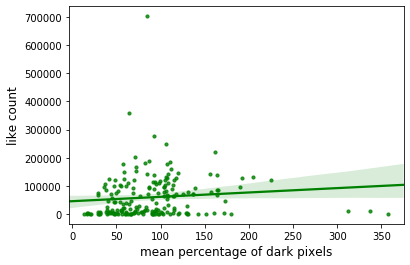

In [157]:
data_2plot = df[["dark_perc_mean","like_count"]]
plot_corr_sns = sns.regplot(x="dark_perc_mean", y="like_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of dark pixels",fontsize=12)
plot_corr_sns.set_ylabel("like count",fontsize=12)
plt.show() 

In [158]:
plot_corr_sns.figure.savefig("scatterplot_like__darkperc.png")

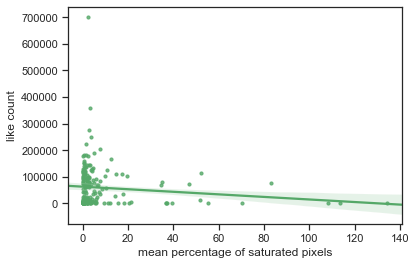

In [181]:
data_2plot = df[["saturated_perc_mean","like_count"]]
plot_corr_sns = sns.regplot(x="saturated_perc_mean", y="like_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of saturated pixels",fontsize=12)
plot_corr_sns.set_ylabel("like count",fontsize=12)
plt.show() 

In [182]:
plot_corr_sns.figure.savefig("scatterplot_like__saturatedperc.png")

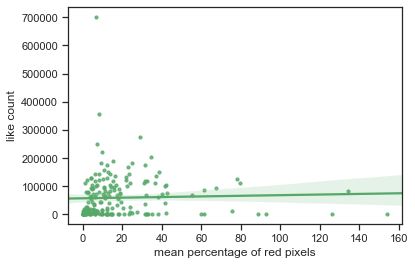

In [183]:
data_2plot = df[["red_perc_mean","like_count"]]
plot_corr_sns = sns.regplot(x="red_perc_mean", y="like_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of red pixels",fontsize=12)
plot_corr_sns.set_ylabel("like count",fontsize=12)
plt.show() 

In [184]:
plot_corr_sns.figure.savefig("scatterplot_like__redperc.png")

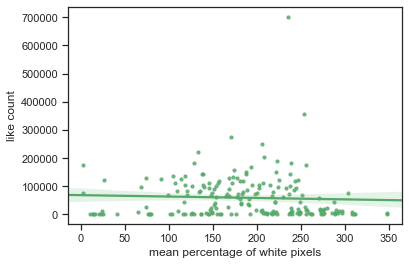

In [185]:
data_2plot = df[["white_perc_mean","like_count"]]
plot_corr_sns = sns.regplot(x="white_perc_mean", y="like_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of white pixels",fontsize=12)
plot_corr_sns.set_ylabel("like count",fontsize=12)
plt.show() 

In [186]:
plot_corr_sns.figure.savefig("scatterplot_like__whiteperc.png")

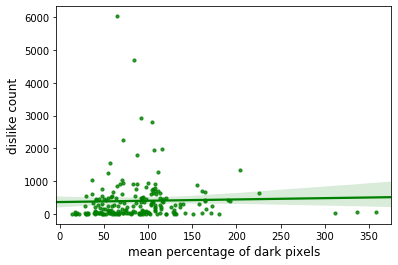

In [159]:
data_2plot = df[["dark_perc_mean","dislike_count"]]
plot_corr_sns = sns.regplot(x="dark_perc_mean", y="dislike_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of dark pixels",fontsize=12)
plot_corr_sns.set_ylabel("dislike count",fontsize=12)
plt.show() 

In [160]:
plot_corr_sns.figure.savefig("scatterplot_dislike__darkperc.png")

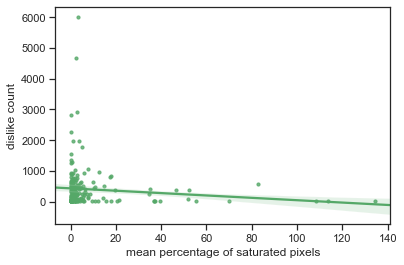

In [187]:
data_2plot = df[["saturated_perc_mean","dislike_count"]]
plot_corr_sns = sns.regplot(x="saturated_perc_mean", y="dislike_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of saturated pixels",fontsize=12)
plot_corr_sns.set_ylabel("dislike count",fontsize=12)
plt.show() 

In [188]:
plot_corr_sns.figure.savefig("scatterplot_dislike__saturatedperc.png")

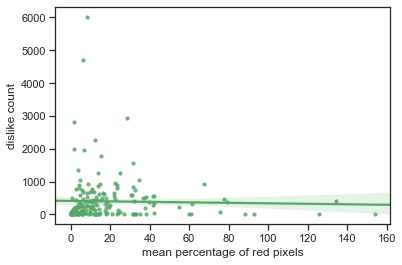

In [189]:
data_2plot = df[["red_perc_mean","dislike_count"]]
plot_corr_sns = sns.regplot(x="red_perc_mean", y="dislike_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of red pixels",fontsize=12)
plot_corr_sns.set_ylabel("dislike count",fontsize=12)
plt.show() 

In [190]:
plot_corr_sns.figure.savefig("scatterplot_dislike__redperc.png")

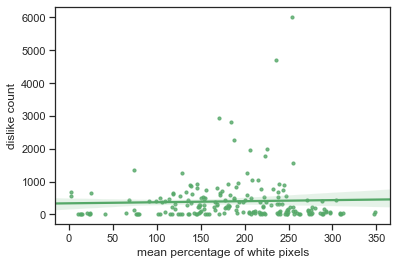

In [191]:
data_2plot = df[["white_perc_mean","dislike_count"]]
plot_corr_sns = sns.regplot(x="white_perc_mean", y="dislike_count", color="g", data=data_2plot, scatter_kws={'s':10}) #regplot function is from seaborn
plot_corr_sns.set_xlabel("mean percentage of white pixels",fontsize=12)
plot_corr_sns.set_ylabel("dislike count",fontsize=12)
plt.show() 

In [192]:
plot_corr_sns.figure.savefig("scatterplot_dislike__whiteperc.png")